# Intro
Name:  

    Explore_cld_retrieval

Purpose:  

    Run throught the retrieved cloud properties and either flag or assure retrieval quality
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - plotting_utils (user defined plotting routines)
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - 4STAR_cloud retrieval .mat files
  
 Modification History:
 
     Written: by Samuel LeBlanc, NASA Ames, Moffett Field, CA, 2016-10-26

# Import of modules

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
%matplotlib notebook
import numpy as np
import scipy.io as sio
import hdf5storage as hs
import Sp_parameters as Sp

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# set the basic directory path
fp = 'C:/Users/sleblan2/Research/ORACLES/starzen/'
fp_plot = 'C:/Users/sleblan2/Research/ORACLES/plot/'

# Load the files

In [3]:
dds = ['20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927']

In [4]:
rts = []
sps = []

In [5]:
for daystr in dds:
    print daystr
    rt = hs.loadmat(fp+'{}_zen_cld_retrieved.mat'.format(daystr))
    s = sio.loadmat(fp+'4STAR_{}starzen.mat'.format(daystr))
    sp = Sp.Sp(s)
    rts.append(rt)
    sps.append(sp)

20160827
1556 1556
in rads
(749L, 1556L) 2 1556
1 in ui
(749L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20160830
1556 1556
in rads
(305L, 1556L) 2 1556
1 in ui
(305L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20160831
1556 1556
in rads
(1337L, 1556L) 2 1556
1 in ui
(1337L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20160902
1556 1556
in rads
(1013L, 1556L) 2 1556
1 in ui
(1013L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20160904
1556 1556
in rads
(1858L, 1556L) 2 1556
1 in ui
(1858L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20160906
1556 1556
in rads
(1120L, 1556L) 2 1556
1 in ui
(1120L, 1556L)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20160908
1556 

## Load the cloud probe incloud flag

In [23]:
from load_utils import mat2py_time,toutc

In [24]:
p = sio.netcdf_file(fp+'..//data_other//oracles.cloud.timings.nc','r')

In [25]:
p.variables

{'cloud_time_20160902': <scipy.io.netcdf.netcdf_variable at 0x47900da0>,
 'cloud_time_20160904': <scipy.io.netcdf.netcdf_variable at 0x47900f60>,
 'cloud_time_20160906': <scipy.io.netcdf.netcdf_variable at 0x18a37240>,
 'cloud_time_20160908': <scipy.io.netcdf.netcdf_variable at 0x18a583c8>,
 'cloud_time_20160910': <scipy.io.netcdf.netcdf_variable at 0x478e20f0>,
 'cloud_time_20160912': <scipy.io.netcdf.netcdf_variable at 0x478e21d0>,
 'cloud_time_20160914': <scipy.io.netcdf.netcdf_variable at 0x478e22b0>,
 'cloud_time_20160918': <scipy.io.netcdf.netcdf_variable at 0x478e2390>,
 'cloud_time_20160920': <scipy.io.netcdf.netcdf_variable at 0x478e2470>,
 'cloud_time_20160924': <scipy.io.netcdf.netcdf_variable at 0x478e2550>,
 'cloud_time_20160925': <scipy.io.netcdf.netcdf_variable at 0x478e2630>,
 'cloud_time_20160927': <scipy.io.netcdf.netcdf_variable at 0x478e2710>,
 'timevec_20160902': <scipy.io.netcdf.netcdf_variable at 0x47a25c88>,
 'timevec_20160904': <scipy.io.netcdf.netcdf_variable 

In [26]:
p.variables['timevec_20160914'].data

array([ 736587.32859954,  736587.32861111,  736587.32862269, ...,
        736587.65826389,  736587.65827546,  736587.65828704])

In [27]:
t_0914 = mat2py_time(p.variables['timevec_20160914'].data)

<IPython.core.display.Javascript object>


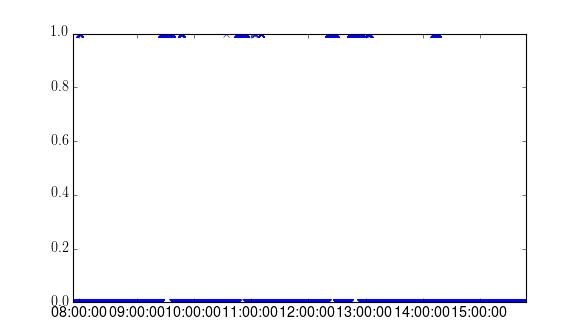

In [28]:
plt.figure()
plt.plot(t_0914,p.variables['cloud_time_20160914'].data,'x')

# Start plotting the results

In [11]:
rt.keys()

[u'tau', u'utc', u'ki', u'sza', u'lon', u'lat', u'phase', u'alt', u'ref']

<IPython.core.display.Javascript object>


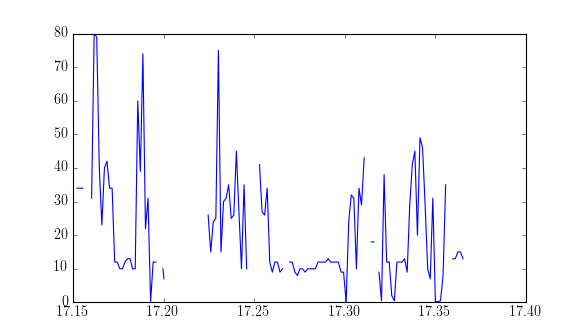

In [13]:
plt.figure()
plt.plot(rt['utc'],rt['tau'])

In [14]:
rt = rts[9]

<IPython.core.display.Javascript object>


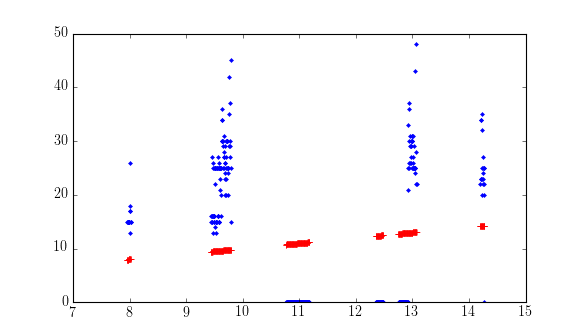

In [15]:
plt.figure()
plt.plot(rts[9]['utc'],rts[9]['tau'],'.')
plt.plot(rts[9]['utc'],rts[9]['utc'],'r+')

<IPython.core.display.Javascript object>


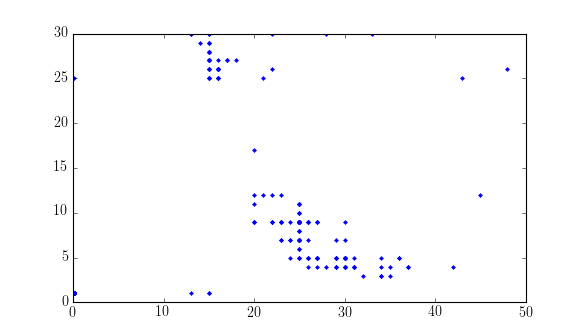

In [16]:
plt.figure()
plt.plot(rts[9]['tau'],rts[9]['ref'],'.')

In [12]:
igood = rts[9]['tau']>0

In [13]:
igood[0:10]

array([False, False, False,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [14]:
sp = sps[9]

<IPython.core.display.Javascript object>


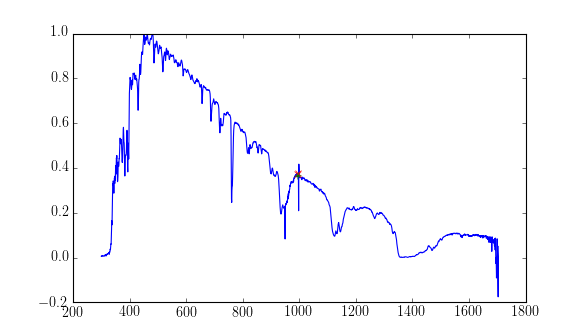

In [15]:
i=68
i_vis = [1061,1062,1064]
i_nir = [1060,1063]
plt.figure()
plt.plot(sp.wvl,sp.norm[i,:])
#plt.xlim(970,1030)
plt.plot(sp.wvl[i_vis],sp.norm[i,i_vis],'rx')
plt.plot(sp.wvl[i_nir],sp.norm[i,i_nir],'g+')


In [16]:
np.nanmean(sp.norm[i,iw])

NameError: name 'iw' is not defined

In [17]:
np.nanmean(sp.norm[i,ii])

NameError: name 'ii' is not defined

## Plot some of the sza for each day to ensure good fitting of lut

<IPython.core.display.Javascript object>


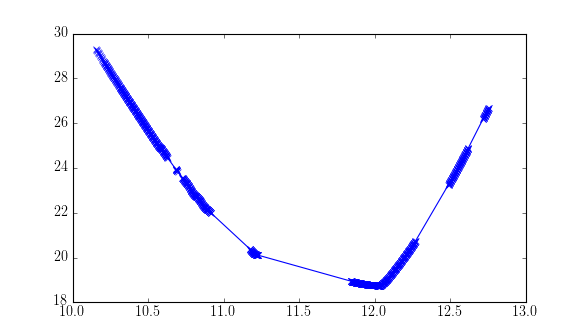

In [70]:
plt.figure()
plt.plot(sps[7].utc,sps[7].sza,'x-')

# Now setup filters to weed out bad data

## Filter out data points where nir and vis spectrometers don't match

In [29]:
i_vis = [1061,1062,1064]
i_nir = [1060,1063]

In [30]:
for i,daystr in enumerate(dds):
    nvis = np.nanmean(sps[i].norm[:,i_vis],axis=1)
    nnir = np.nanmean(sps[i].norm[:,i_nir],axis=1)
    rts[i]['delta'] = abs(nvis-nnir)
    rts[i]['fl_match'] = rts[i]['delta']<0.06
    print daystr,rts[i]['delta'].shape,rts[i]['delta'][rts[i]['fl_match']].shape,\
        float(rts[i]['delta'][rts[i]['fl_match']].shape[0])/ float(rts[i]['delta'].shape[0])*100.0

20160827 (749L,) (543L,) 72.4966622163
20160830 (305L,) (163L,) 53.4426229508
20160831 (1337L,) (909L,) 67.9880329095
20160902 (1013L,) (642L,) 63.3761105627
20160904 (1858L,) (1178L,) 63.4015069968
20160906 (1120L,) (736L,) 65.7142857143
20160908 (105L,) (70L,) 66.6666666667
20160910 (1415L,) (1034L,) 73.074204947
20160912 (662L,) (434L,) 65.5589123867
20160914 (438L,) (303L,) 69.1780821918
20160918 (553L,) (408L,) 73.7793851718
20160920 (341L,) (195L,) 57.1847507331
20160924 (1369L,) (1102L,) 80.4967129291
20160925 (600L,) (474L,) 79.0
20160927 (145L,) (109L,) 75.1724137931


## Now filter out the times which were at too high altitude

In [31]:
fl_alt = rt['alt']<1000.0

In [32]:
for i,daystr in enumerate(dds):
    rts[i]['fl_alt'] = rts[i]['alt'][:,0]<1000.0
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_alt']].shape,\
        float(rts[i]['utc'][rts[i]['fl_alt']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20160827 (749L,) (736L,) 98.26435247
20160830 (305L,) (305L,) 100.0
20160831 (1337L,) (1226L,) 91.6978309648
20160902 (1013L,) (972L,) 95.9526159921
20160904 (1858L,) (1543L,) 83.0462863294
20160906 (1120L,) (877L,) 78.3035714286
20160908 (105L,) (101L,) 96.1904761905
20160910 (1415L,) (928L,) 65.5830388693
20160912 (662L,) (368L,) 55.5891238671
20160914 (438L,) (438L,) 100.0
20160918 (553L,) (353L,) 63.8336347197
20160920 (341L,) (341L,) 100.0
20160924 (1369L,) (803L,) 58.6559532505
20160925 (600L,) (598L,) 99.6666666667
20160927 (145L,) (145L,) 100.0


## Filter for in cloud

In [33]:
from write_utils import nearest_neighbor

In [34]:
for i,daystr in enumerate(dds):
    try:
        p_time = mat2py_time(p.variables['timevec_{}'.format(daystr)].data)
    except KeyError: # no in cloud data, so choose all of them
        rts[i]['fl_incld'] = rts[i]['utc']>0.0
        continue
    putc = toutc(p_time)
    rts[i]['incld'] = nearest_neighbor(putc,p.variables['cloud_time_{}'.format(daystr)].data,rts[i]['utc'],dist=1.0/3600)
    rts[i]['fl_incld'] = rts[i]['incld']==0
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_incld']].shape,\
        float(rts[i]['utc'][rts[i]['fl_incld']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20160902 (1013L,) (707L,) 69.7926949654
20160904 (1858L,) (911L,) 49.0312163617
20160906 (1120L,) (762L,) 68.0357142857
20160908 (105L,) (44L,) 41.9047619048
20160910 (1415L,) (766L,) 54.1342756184
20160912 (662L,) (350L,) 52.8700906344
20160914 (438L,) (199L,) 45.4337899543
20160918 (553L,) (333L,) 60.2169981917
20160920 (341L,) (282L,) 82.6979472141
20160924 (1369L,) (359L,) 26.2235208181
20160925 (600L,) (267L,) 44.5
20160927 (145L,) (106L,) 73.1034482759


## Filter for high ki squared residuas

In [35]:
for i,daystr in enumerate(dds):
    rts[i]['fl_ki'] = rts[i]['ki']<0.6
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_ki']].shape,\
        float(rts[i]['utc'][rts[i]['fl_ki']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20160827 (749L,) (540L,) 72.0961281709
20160830 (305L,) (122L,) 40.0
20160831 (1337L,) (1012L,) 75.6918474196
20160902 (1013L,) (693L,) 68.4106614018
20160904 (1858L,) (1021L,) 54.9515608181
20160906 (1120L,) (675L,) 60.2678571429
20160908 (105L,) (60L,) 57.1428571429
20160910 (1415L,) (1097L,) 77.5265017668
20160912 (662L,) (500L,) 75.5287009063
20160914 (438L,) (342L,) 78.0821917808
20160918 (553L,) (462L,) 83.5443037975
20160920 (341L,) (192L,) 56.3049853372
20160924 (1369L,) (1136L,) 82.9802775749
20160925 (600L,) (476L,) 79.3333333333
20160927 (145L,) (58L,) 40.0


## Combine the filters

In [36]:
tot=0
tot_fl=0
for i,daystr in enumerate(dds):
    rts[i]['fl'] = rts[i]['fl_match'] & rts[i]['fl_alt'] & rts[i]['fl_incld'] & rts[i]['fl_ki']
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl']].shape,\
        float(rts[i]['utc'][rts[i]['fl']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0 
    tot = tot+len(rts[i]['utc'])
    tot_fl = tot_fl+len(rts[i]['utc'][rts[i]['fl']])

20160827 (749L,) (463L,) 61.8157543391
20160830 (305L,) (113L,) 37.0491803279
20160831 (1337L,) (832L,) 62.2288706058
20160902 (1013L,) (375L,) 37.0187561698
20160904 (1858L,) (293L,) 15.7696447793
20160906 (1120L,) (308L,) 27.5
20160908 (105L,) (14L,) 13.3333333333
20160910 (1415L,) (460L,) 32.5088339223
20160912 (662L,) (188L,) 28.3987915408
20160914 (438L,) (120L,) 27.397260274
20160918 (553L,) (230L,) 41.5913200723
20160920 (341L,) (173L,) 50.7331378299
20160924 (1369L,) (274L,) 20.0146092038
20160925 (600L,) (198L,) 33.0
20160927 (145L,) (31L,) 21.3793103448


In [37]:
print tot, tot_fl, float(tot_fl)/float(tot)*100.0

12010 4072 33.9050791007


# Now plot each retrieved product, filtered

In [97]:
from Sp_parameters import smooth

<IPython.core.display.Javascript object>


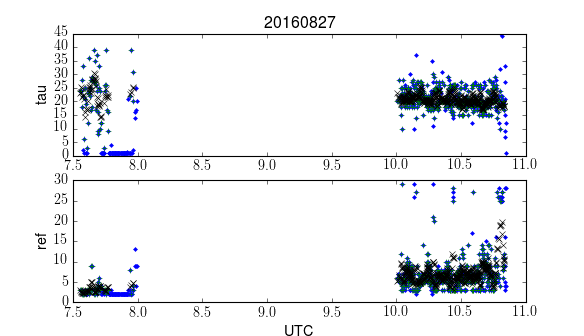

<IPython.core.display.Javascript object>


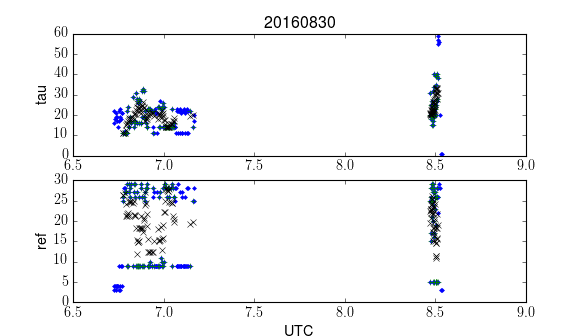

<IPython.core.display.Javascript object>


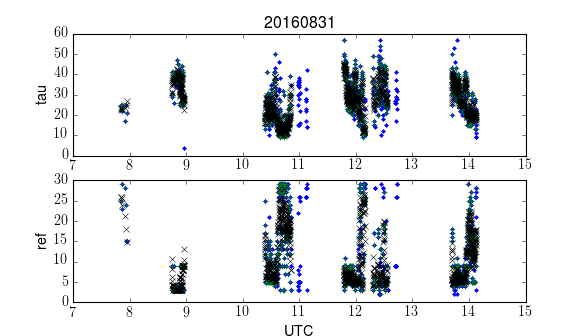

<IPython.core.display.Javascript object>


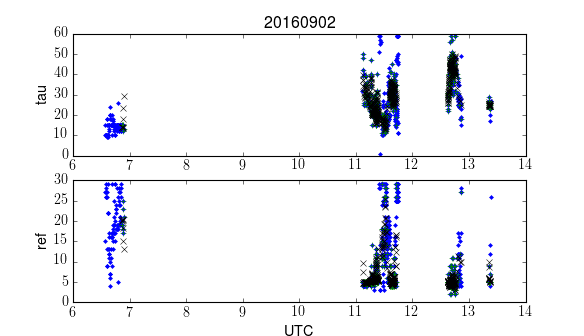

<IPython.core.display.Javascript object>


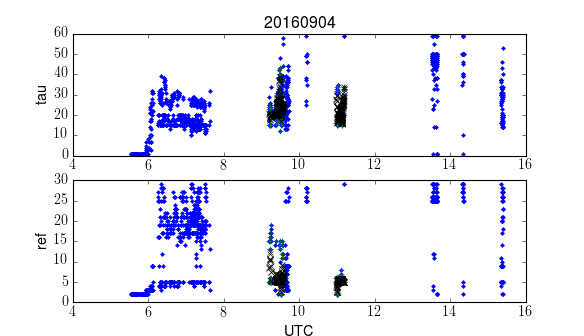

<IPython.core.display.Javascript object>


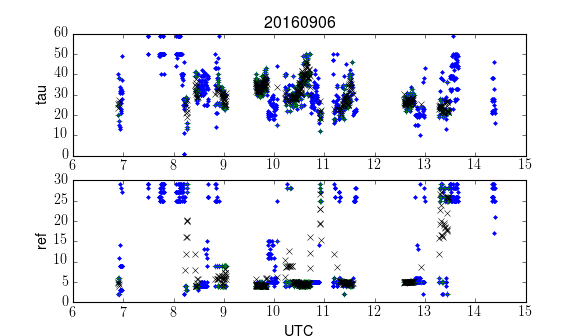

<IPython.core.display.Javascript object>


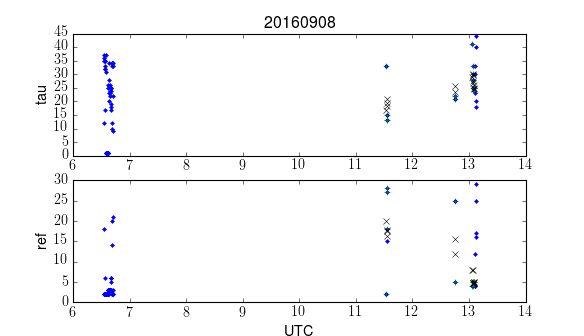

<IPython.core.display.Javascript object>


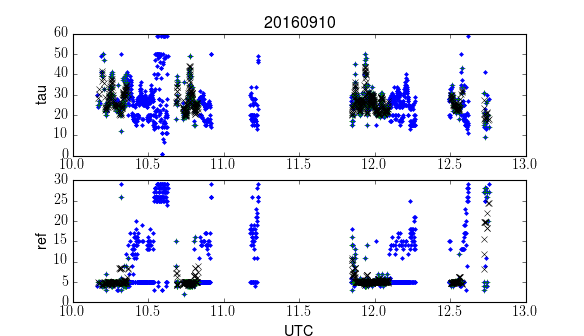

<IPython.core.display.Javascript object>


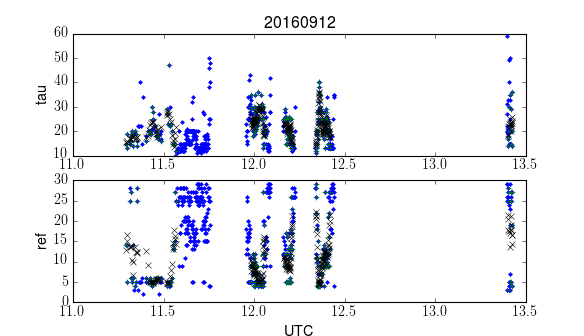

<IPython.core.display.Javascript object>


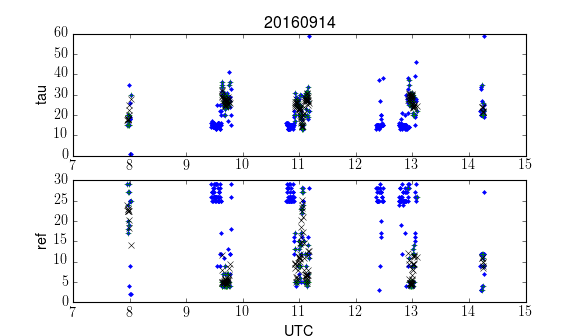

<IPython.core.display.Javascript object>


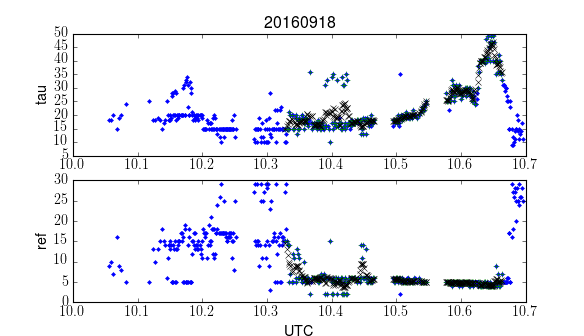

<IPython.core.display.Javascript object>


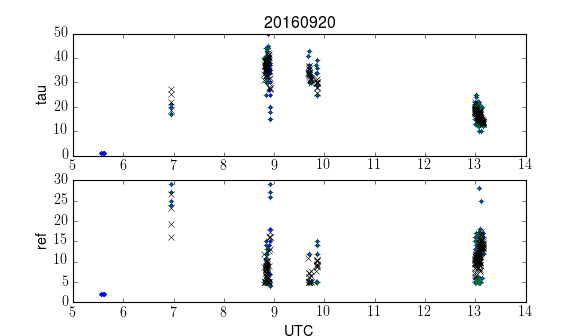

<IPython.core.display.Javascript object>


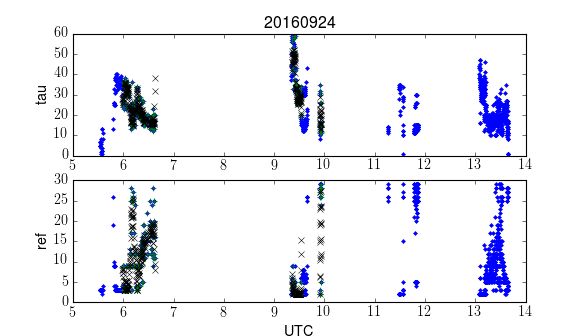

<IPython.core.display.Javascript object>


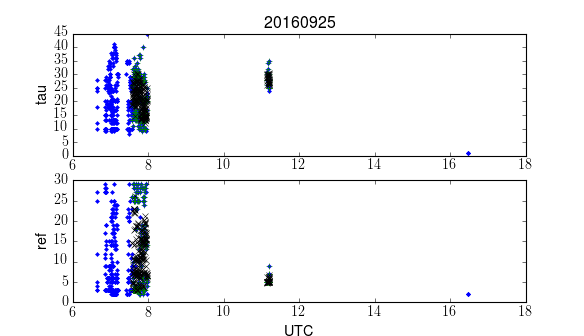

<IPython.core.display.Javascript object>


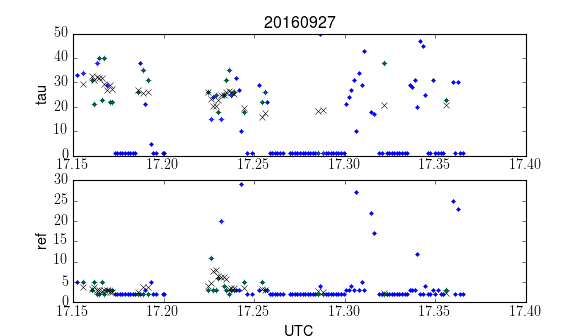

In [98]:
for i,daystr in enumerate(dds):
    plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212,sharex=ax1)
    ax1.plot(rts[i]['utc'],rts[i]['tau'],'b.')
    ax1.plot(rts[i]['utc'][rts[i]['fl']],rts[i]['tau'][rts[i]['fl']],'g+')
    try:
        ax1.plot(rts[i]['utc'][rts[i]['fl']],smooth(rts[i]['tau'][rts[i]['fl']],6),'kx')
    except:
        pass
    ax1.set_ylabel('tau')
    
    ax2.plot(rts[i]['utc'],rts[i]['ref'],'b.')
    ax2.plot(rts[i]['utc'][rts[i]['fl']],rts[i]['ref'][rts[i]['fl']],'g+')
    try:
        ax2.plot(rts[i]['utc'][rts[i]['fl']],smooth(rts[i]['ref'][rts[i]['fl']],6),'kx')
    except:
        pass
    ax2.set_ylabel('ref')
    ax2.set_xlabel('UTC')
    ax1.set_title(daystr)

In [100]:
for i,daystr in enumerate(dds):
    try:
        rts[i]['tau_fl'] = smooth(rts[i]['tau'][rts[i]['fl']],6)
        rts[i]['ref_fl'] = smooth(rts[i]['ref'][rts[i]['fl']],6)
    except:
        print 'except',i
        rts[i]['tau_fl'] = rts[i]['tau'][rts[i]['fl']]
        rts[i]['ref_fl'] = rts[i]['ref'][rts[i]['fl']]
    rts[i]['lat_fl'] = rts[i]['lat'][rts[i]['fl']]
    rts[i]['lon_fl'] = rts[i]['lon'][rts[i]['fl']]
    rts[i]['alt_fl'] = rts[i]['alt'][rts[i]['fl']]
    rts[i]['utc_fl'] = rts[i]['utc'][rts[i]['fl']]

In [101]:
rt.keys()

['fl_alt',
 u'tau',
 u'sza',
 'lat_fl',
 u'phase',
 'lon_fl',
 u'alt',
 'alt_fl',
 u'lon',
 'tau_fl',
 u'ref',
 'fl_ki',
 'incld',
 'utc_fl',
 'delta',
 u'lat',
 'fl',
 'fl_match',
 u'utc',
 u'ki',
 'fl_incld',
 'ref_fl']

# Now write these values to ict file

In [30]:
import write_utils as wu

In [75]:
hdict = {'PI':'Jens Redemann',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)',
     'campaign':'ORACLES 2016',
     'special_comments':'Retrieved cloud properties',
     'PI_contact':'Jens.Redemann-1@nasa.gov',
     'platform':'NASA P3',
     'location':'based out of Walvis Bay, Namibia, actual location of measurement included in file',
     'instrument_info':'Derived product from 4STAR zenith measurements',
     'data_info':'Using the cloud property retrieval method based on spectral transmitted light measurements described by LeBlanc, Pileskie, Schmidt, and Coddington (2015), AMT',
     'uncertainty':'Undefined in preliminary archival',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'ORACLES 2016 deployment; August-September 2016; Walvis Bay, Namibia',
     'stipulations':'Use of these data requires PRIOR OK from the PI; this is preliminary data',
     'rev_comments':"""R0: Preliminary archival of cloud properties retrieived from 4STAR sky radiance measurements. 
    Final radiance calibration not yet applied. Filtered out in-cloud data, bad measurements, and high clouds. 
    Data is subject to uncertainties linked to detector stability, transfer efficiency of light through fiber optic cable, and deposition on the instrument window."""
    }
order = ['LAT','LON','COD','REF']

In [78]:
for i,daystr in enumerate(dds):
    d_dict = {'Start_UTC':{'data':rts[i]['utc'][rts[i]['fl']]*3600.0,'unit':'seconds from midnight UTC','long_description':'time keeping'},
              'utc':{'data':rts[i]['utc'][rts[i]['fl']],'unit':'seconds from midnight UTC','long_description':'time keeping'},
          'COD':{'data':rts[i]['tau_fl'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
          'REF':{'data':rts[i]['ref_fl'],'unit':'micrometer','long_description':'Cloud drop effective radius for liquid clouds'},
          'LAT':{'data':rts[i]['lat'][rts[i]['fl']],'unit':'Degrees','long_description':'Latitude of measurement, negative for Southern hemisphere'},
          'LON':{'data':rts[i]['lon'][rts[i]['fl']],'unit':'Degrees','long_description':'Longitude of measurement, East is positive, from -180 to 180'}
          }
    d_dict_out = wu.prep_data_for_ict(d_dict,in_var_name='utc',out_var_name='Start_UTC', in_input=True,time_interval=1.0)
    wu.write_ict(hdict,d_dict_out,filepath=fp+'..//zen_ict/v3/',
              data_id='4STAR_CLD',loc_id='P3',date=daystr,rev='R0',order=order)    

NameError: name 'wu' is not defined

## For use of this python, save values to mat files

In [102]:
import hdf5storage as hs

In [103]:
rtss = {str(i):rr for i,rr in enumerate(rts)}

In [104]:
def dict_keys_to_unicode(d):
    out = dict()
    for k, v in d.items():
        out[k.decode()] = v
    return out

for n in rtss.keys():
    if type(rtss[n]) is list:
        print n
        for i,t in enumerate(rtss[n]):
            rtss[n][i] = dict_keys_to_unicode(t)
    else:
        print 'no',n
        rtss[n] = dict_keys_to_unicode(rtss[n])


no 11
no 10
no 13
no 12
no 14
no 1
no 0
no 3
no 2
no 5
no 4
no 7
no 6
no 9
no 8


In [105]:
hs.savemat(fp+'..//zen_ict/v3/{}_all_retrieved.mat'.format(vv),rtss)

## Optionally load the saved mat files

In [82]:
rtss = hs.loadmat(fp+'..//zen_ict/v3/{}_all_retrieved.mat'.format(vv))

In [83]:
if not rts:
    rts = []
    for n in rtss.keys().sort():
        rts.append(rtss[n])

# Make plots

## Read the files as a verification

In [54]:
from load_utils import load_ict

In [55]:
vv = 'R0'
out_RA = []
out_head_RA = []
for d in dds:
    fname_aod = fp+'..//zen_ict/v3/4STAR-CLD_P3_{}_{vv}.ict'.format(d,vv=vv)
    tt,th = load_ict(fname_aod,return_header=True)
    out_RA.append(tt)
    out_head_RA.append(th)

('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')


In [79]:
out_head_RA[0]

['41, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2016\n',
 '1,1\n',
 '2016,08,27,2016,11,28\n',
 '1.0\n',
 'Start_UTC, Seconds, Time of measurement continuous starting from midnight UTC\n',
 '4\n',
 '1,1,1,1\n',
 '-9999.000,-9999.000,-9999.000,-9999.000\n',
 'LAT, Degrees, Latitude of measurement, negative for Southern hemisphere\n',
 'LON, Degrees, Longitude of measurement, East is positive, from -180 to 180\n',
 'COD, None, Cloud Optical Depth of overlying cloud\n',
 'REF, micrometer, Cloud drop effective radius for liquid clouds\n',
 '1\n',
 'Retrieved cloud properties\n',
 '22\n',
 '-----------------------------------------------------------------------------\n',
 'PI_CONTACT_INFO: Jens.Redemann-1@nasa.gov\n',
 'PLATFORM: NASA P3\n',
 'LOCATION: based out of Walvis Bay, Namibia, actual location of measurement included in file\n',
 'ASSOCIATED_DATA: N/A\n',
 'INSTRUMENT_INFO: 

In [56]:
nm = out_RA[0].dtype.names

In [81]:
nm

('Start_UTC', 'LAT', 'LON', 'COD', 'REF')

In [82]:
ax[0].get_xticks()

TypeError: 'AxesSubplot' object does not support indexing

In [83]:
xt = ax[0].get_xticks()
xl = []
for x in xt:
    ii = np.argmin(abs(out_RA[i][nm[0]]-x))
    xl.append('{:2.2f}'.format(out_RA[i]['LAT'][ii]))

TypeError: 'AxesSubplot' object does not support indexing

<IPython.core.display.Javascript object>


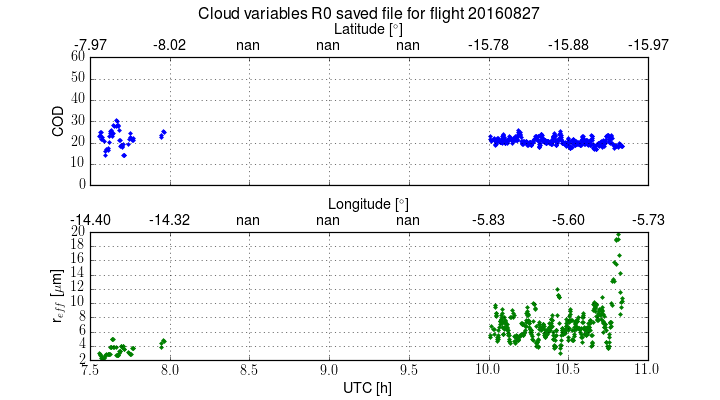

<IPython.core.display.Javascript object>


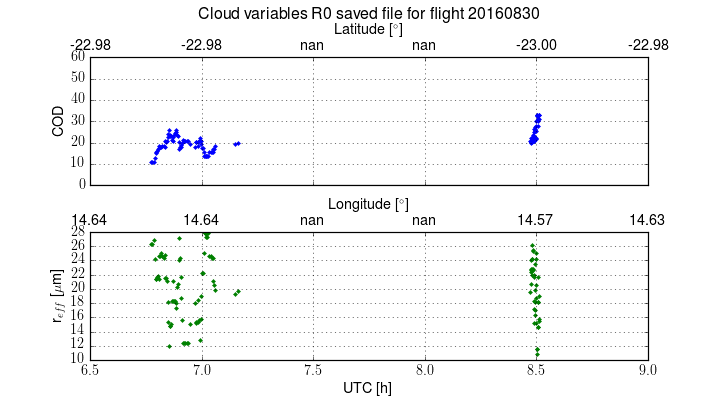

<IPython.core.display.Javascript object>


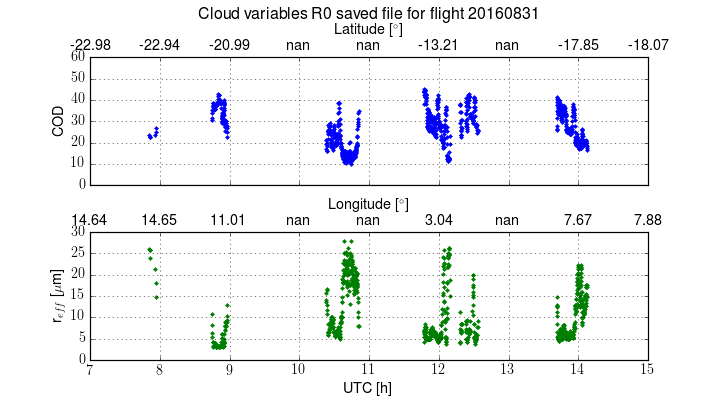

<IPython.core.display.Javascript object>


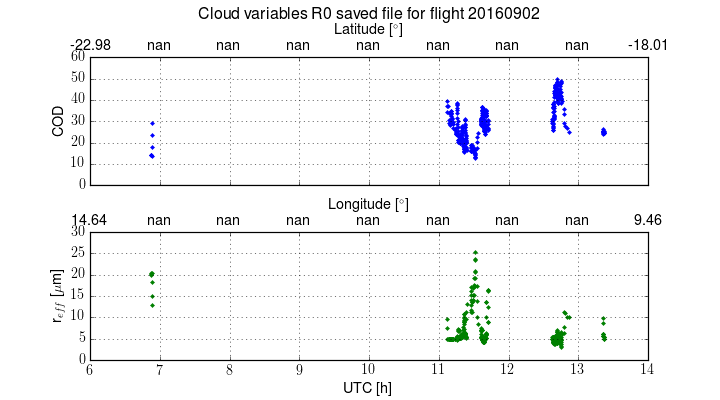

<IPython.core.display.Javascript object>


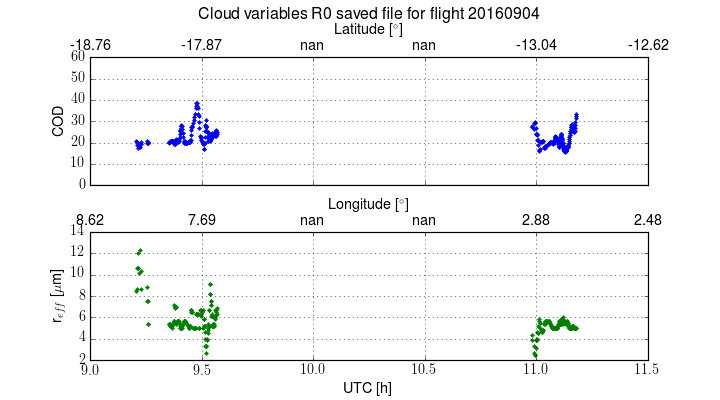

<IPython.core.display.Javascript object>


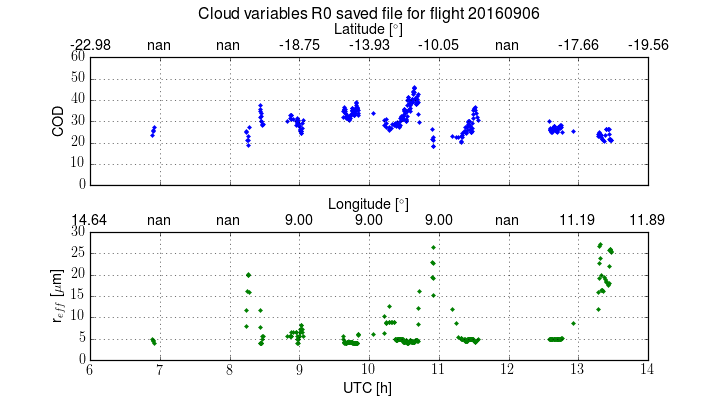

<IPython.core.display.Javascript object>


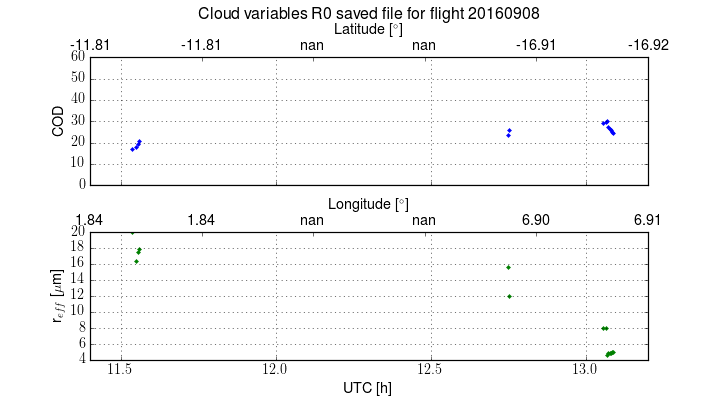

<IPython.core.display.Javascript object>


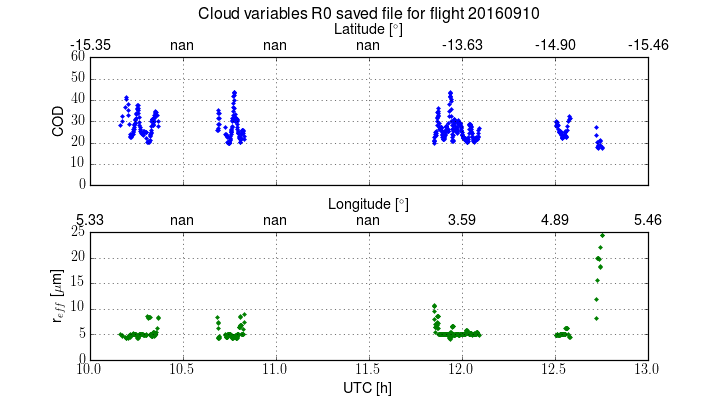

<IPython.core.display.Javascript object>


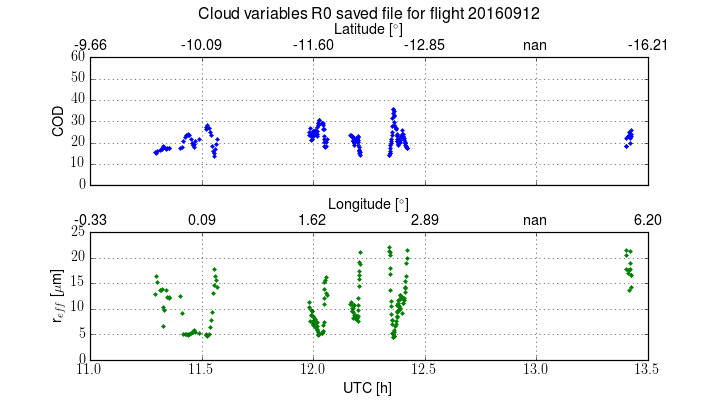

<IPython.core.display.Javascript object>


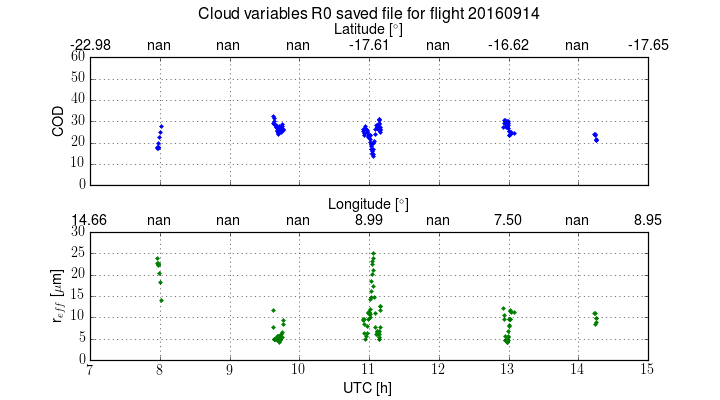

<IPython.core.display.Javascript object>


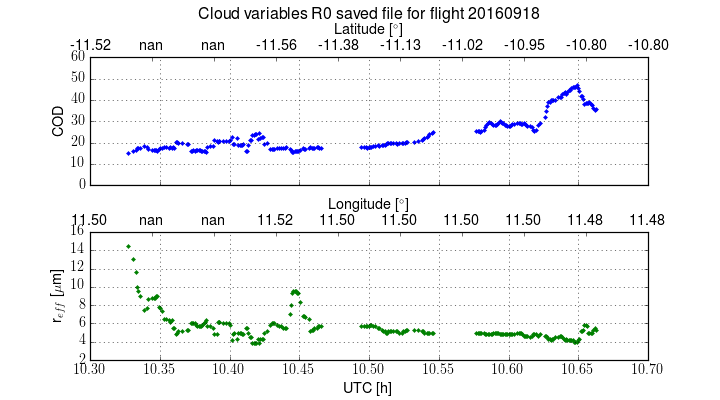

<IPython.core.display.Javascript object>


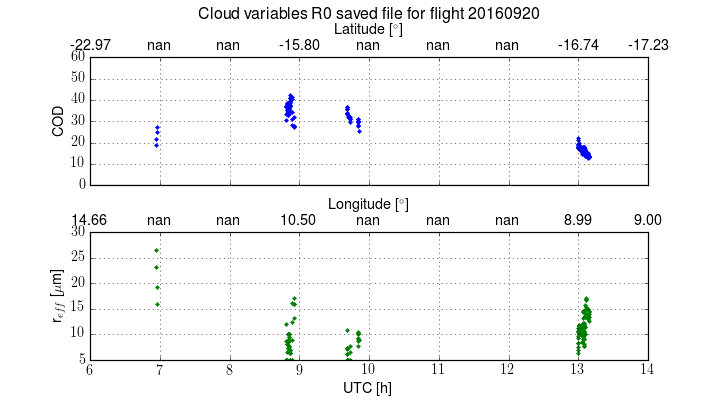

<IPython.core.display.Javascript object>


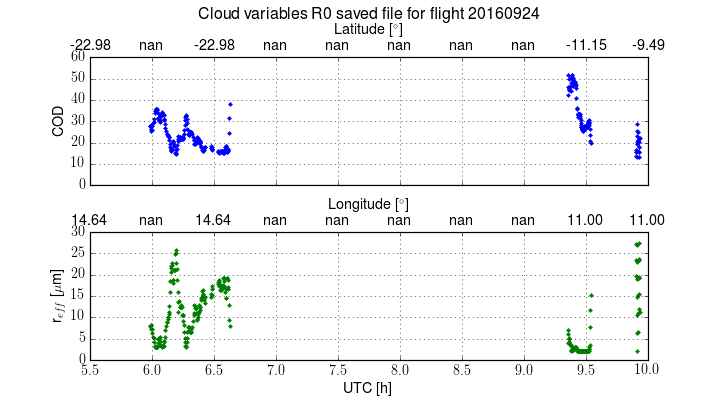

<IPython.core.display.Javascript object>


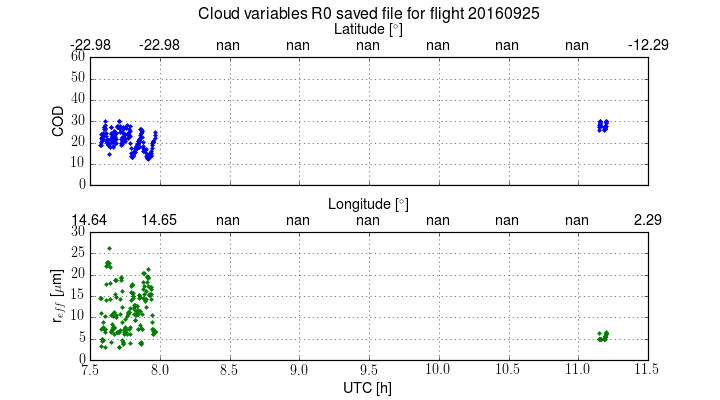

<IPython.core.display.Javascript object>


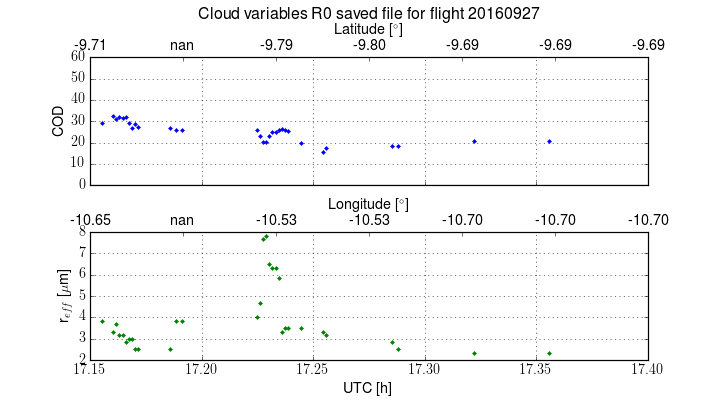

In [84]:
for i,d in enumerate(dds):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Cloud variables {} saved file for flight {}'.format(vv,d),y=1.25)
    #ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    ax[0].plot(out_RA[i][nm[0]],out_RA[i]['COD'],'.')
    ax[0].set_ylabel('COD')
    ax[0].set_ylim(0,60)
    ax[0].axhline(0,color='k')
    ax[0].grid()
    axy0 = ax[0].twiny()
    axy0.set_xlim(ax[0].get_xlim())
    xt = ax[0].get_xticks()
    xl = []
    for x in xt:
        ii = np.argmin(abs(out_RA[i][nm[0]]-x))
        if np.isfinite(out_RA[i]['LAT'][ii]):
            xl.append('{:2.2f}'.format(out_RA[i]['LAT'][ii]))
        else:
            xl.append('{:2.2f}'.format(np.nanmean(out_RA[i]['LAT'][ii-300:ii+300])))
    axy0.set_xticks(xt)
    axy0.set_xticklabels(xl)
    axy0.set_xlabel('Latitude [$^\\circ$]')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width, box.height*0.88])
    axy0.set_position([box.x0, box.y0, box.width, box.height*0.88])
    
    ax[1].plot(out_RA[i][nm[0]],out_RA[i]['REF'],'g.')
    ax[1].set_ylabel('r$_{{eff}}$ [$\\mu$m]')
    ax[1].set_xlabel('UTC [h]')
    ax[1].grid()
    axy1 = ax[1].twiny()
    axy1.set_xlim(ax[1].get_xlim())
    x1t = ax[1].get_xticks()
    x1l = []
    for x in x1t:
        ii = np.argmin(abs(out_RA[i][nm[0]]-x))
        if np.isfinite(out_RA[i]['LON'][ii]):
            x1l.append('{:2.2f}'.format(out_RA[i]['LON'][ii]))
        else:
            x1l.append('{:2.2f}'.format(np.nanmean(out_RA[i]['LON'][ii-300:ii+300])))
    axy1.set_xticks(x1t)
    axy1.set_xticklabels(x1l)
    axy1.set_xlabel('Longitude [$^\\circ$]')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width, box.height*0.88])
    axy1.set_position([box.x0, box.y0, box.width, box.height*0.88])
    plt.savefig(fp+'..//zen_ict/v3/{vv}_{}.png'.format(d,vv=vv),dpi=600,transparent=True)

## Combine the data into a single array

In [106]:
ar = {}
for n in rts[0].keys():
    ar[n] = np.array([])

In [107]:
ar['days'] = np.array([])

In [108]:
for i,d in enumerate(dds):
    ar['days'] = np.append(ar['days'],np.zeros_like(rts[i]['utc'])+i)
    for n in rts[0].keys():
        ar[n] = np.append(ar[n],rts[i][n])

## Save the combined array

In [60]:
import hdf5storage as hs

In [61]:
hs.savemat(fp+'..//zen_ict/v3/{}_all_cld_ict.mat'.format(vv),ar)

## Optionally load the all ict file

In [62]:
if not ar:
    ar = hs.loadmat(fp+'..//zen_ict/v3/{}_all_cld_ict.mat'.format(vv))

## plot the data on a map

In [109]:
import plotting_utils as pu

In [110]:
from map_interactive import build_basemap

In [111]:
rts[i]['tau_fl']

array([ 29.33333333,  32.5       ,  31.16666667,  32.16666667,
        31.83333333,  32.        ,  29.33333333,  27.        ,
        29.        ,  27.5       ,  27.        ,  25.83333333,
        26.16666667,  26.        ,  23.16666667,  20.5       ,
        20.33333333,  23.        ,  24.83333333,  24.83333333,
        26.16666667,  26.66666667,  26.16666667,  25.33333333,
        19.66666667,  15.66666667,  17.66666667,  18.5       ,
        18.66666667,  20.66666667,  20.66666667])

In [112]:
for i,daystr in enumerate(dds):
    print rts[i]['lat'][rts[i]['fl']][:,0].shape,rts[i]['lon'][rts[i]['fl']][:,0].shape,rts[i]['tau_fl'].shape

(463L,) (463L,) (463L,)
(113L,) (113L,) (113L,)
(832L,) (832L,) (832L,)
(375L,) (375L,) (375L,)
(293L,) (293L,) (293L,)
(308L,) (308L,) (308L,)
(14L,) (14L,) (14L,)
(460L,) (460L,) (460L,)
(188L,) (188L,) (188L,)
(120L,) (120L,) (120L,)
(230L,) (230L,) (230L,)
(173L,) (173L,) (173L,)
(274L,) (274L,) (274L,)
(198L,) (198L,) (198L,)
(31L,) (31L,) (31L,)


<IPython.core.display.Javascript object>


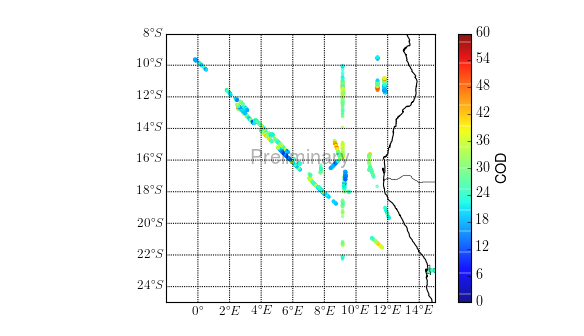

In [113]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-2,-25],upper_right=[15,-8],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['tau_fl'],
              s=10,alpha=0.7,vmin=0.0,vmax=60.0,edgecolor='None')
    sa.append(sca)
pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('COD')
plt.savefig(fp+'..//zen_ict/v3/COD_map.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


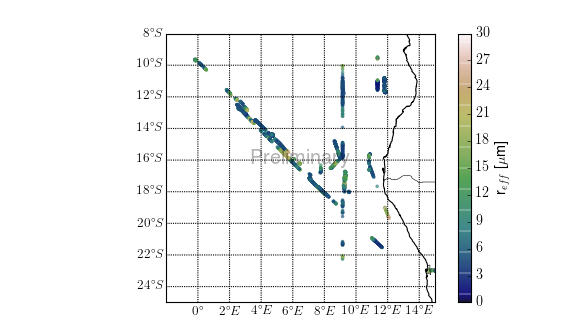

In [114]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-2,-25],upper_right=[15,-8],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['ref_fl'],
              s=10,alpha=0.7,vmin=0.0,vmax=30.0,edgecolor='None',cmap=plt.cm.gist_earth)
    sa.append(sca)
pu.prelim()
cb = plt.colorbar(sa[0])
cb.set_label('r$_{{eff}}$ [$\\mu$m]')
plt.savefig(fp+'..//zen_ict/v3/REF_map.png',transparent=True,dpi=600)

## Plot out some statistics of all retrievals

<IPython.core.display.Javascript object>


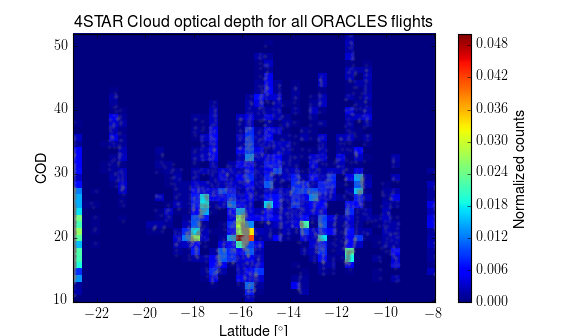

In [55]:
plt.figure()
plt.plot(ar['lat_fl'],ar['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lat_fl'],ar['tau_fl'],bins=40,normed=True)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Cloud optical depth for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v3/COD_hist_lat.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


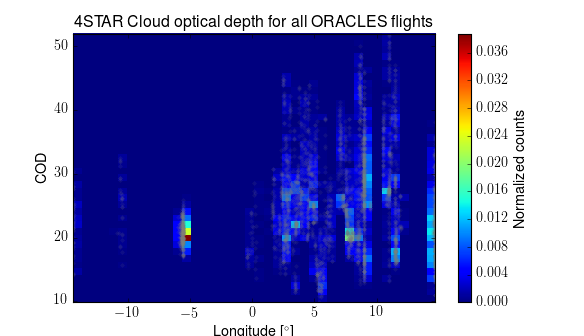

In [56]:
plt.figure()
plt.plot(ar['lon_fl'],ar['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lon_fl'],ar['tau_fl'],bins=40,normed=True)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Cloud optical depth for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v3/COD_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


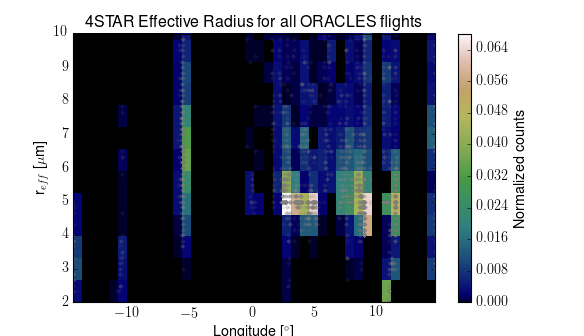

In [57]:
plt.figure()
plt.plot(ar['lon_fl'],ar['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lon_fl'],ar['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
plt.ylim(2,10)
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Effective Radius for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v3/ref_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


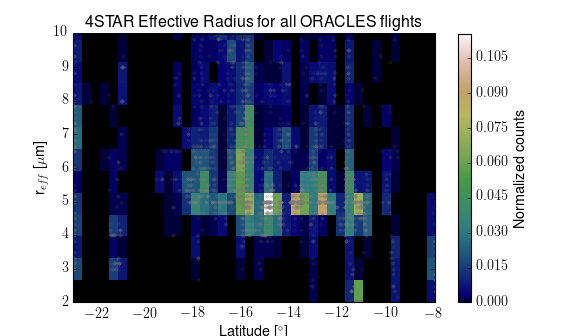

In [58]:
plt.figure()
plt.plot(ar['lat_fl'],ar['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lat_fl'],ar['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.ylim(2,10)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Effective Radius for all ORACLES flights')
plt.savefig(fp+'..//zen_ict/v3/ref_hist_lat.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


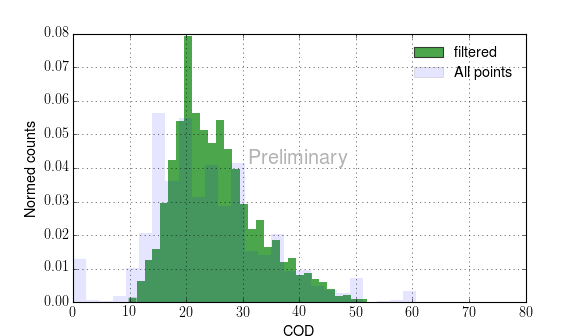

In [115]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v3/cod_hist.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


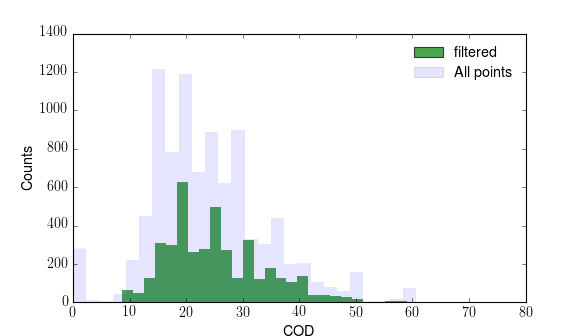

In [94]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,70),label='All points')
plt.ylabel('Counts')
plt.xlabel('COD')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v3/cod_hist_all.png',transparent=True,dpi=600)

In [116]:
np.nanmean(ar['tau_fl'])

25.342992796332677

In [117]:
np.nanmean(ar['ref_fl'])

8.3607154551407969

<IPython.core.display.Javascript object>


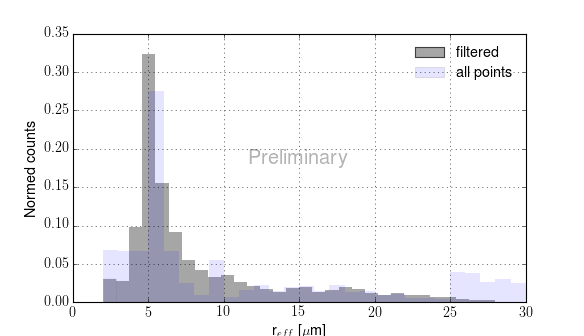

In [118]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
plt.ylabel('Normed counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v3/ref_hist.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


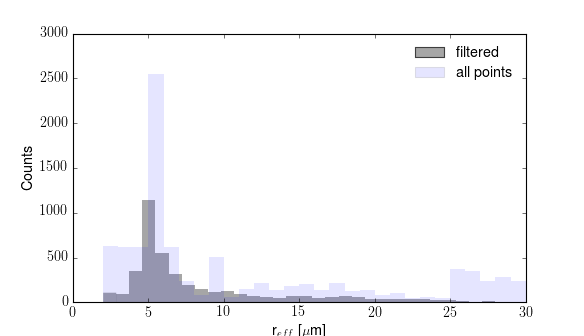

In [66]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,30),label='all points')
plt.ylabel('Counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict/v3/ref_hist_all.png',transparent=True,dpi=600)

In [132]:
reload(pu)

<module 'plotting_utils' from 'plotting_utils.py'>

<IPython.core.display.Javascript object>


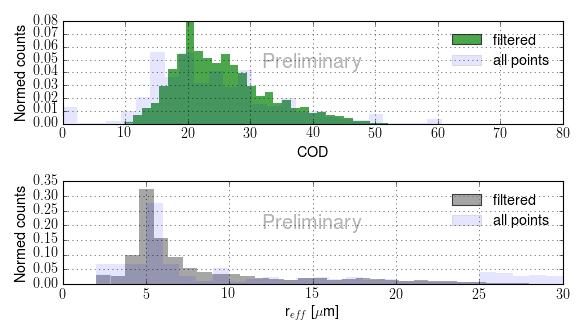

In [133]:
fig,ax = plt.subplots(2,1)
ax = ax.ravel()
ax[0].hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
ax[0].hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='all points')
ax[0].set_ylabel('Normed counts')
ax[0].set_xlabel('COD')
ax[0].grid()
pu.prelim(ax=ax[0])
ax[0].legend(frameon=False)

ax[1].hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
ax[1].hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
ax[1].set_ylabel('Normed counts')
ax[1].set_xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
pu.prelim(ax=ax[1])
plt.legend(frameon=False)

plt.tight_layout()

plt.savefig(fp+'..//zen_ict/v3/ref_cod_hist.png',transparent=True,dpi=600)